In [4]:
import numpy as np
import os
from keras.layers import Conv3D, MaxPooling3D
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.layers import Activation, ZeroPadding3D, TimeDistributed, LSTM, GRU, Reshape
from keras.utils import plot_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import gc
from sklearn.metrics import classification_report, balanced_accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.preprocessing import LabelEncoder
import sklearn
import seaborn as sns
import tensorflow as tf
from keras import regularizers
from prettytable import PrettyTable

In [5]:

# Set the directory path where the text files are located
dir_path = "/kaggle/input/best-lip-reading-dataset/outputs"

# Set the dimensions of each frame
height, width, channels = 80, 112, 3

# Initialize arrays to store the video frames and their corresponding labels
videos = []
labels = []
counter = 0
# Loop through each text file and extract the video frames
for root, dirs, files in os.walk(dir_path):
    

    for file in files:
        if file == "data.txt":

            # Extract the label from the directory name
            label = root.split("/")[-1]
            label = label.split("_")[0]
            #if label not in wanted_words:
            #    continue
            counter += 1
            print(counter, end=" ")
            

            with open(os.path.join(root, file), 'r') as f:
                data_str = f.read()

            # Evaluate the contents of the text file as a Python expression
            data_list = eval(data_str)
            
            # Convert the list to a numpy array
            data_array = np.array(data_list)
            #print(data_array.shape)

            # Reshape the data into a 4D array of shape (num_frames, height, width, channels)
            num_frames = len(data_list)
            frames = data_array.reshape((num_frames, height, width, channels))
            # Append the frames and label to the videos and labels arrays
            videos.append(frames)
            labels.append(label)
print(labels)

# Convert the videos and labels arrays to NumPy arrays
videos = np.array(videos)
labels = np.array(labels)

# Save the videos and labels as separate .npy files
np.save("videosCorrect.npy", videos)
np.save("labelsCorrect.npy", labels)


1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/better-lip-reading/videosCorrect.npy'

In [6]:
videos = np.load('/kaggle/working/videosCorrect.npy')
labels = np.load('/kaggle/working/labelsCorrect.npy')


# Print the shape of the videos and labels arrays

In [7]:
print("Videos shape:", videos.shape)
print("Labels shape:", labels.shape)

Videos shape: (681, 22, 80, 112, 3)
Labels shape: (681,)


In [8]:
encoder = LabelEncoder()
encoder.fit(labels)
encoded_labels = encoder.transform(labels)
labels = encoded_labels

In [9]:
label_dict = {6: 'hello', 5: 'dog', 10: 'my', 12: 'you', 9: 'lips', 3: 'cat', 11: 'read', 0: 'a', 4: 'demo', 7: 'here', 8: 'is', 1: 'bye', 2: 'can'}

# Split the data into training and validation sets

In [61]:
X_train, X_test, y_train, y_test = train_test_split(videos, labels, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (544, 22, 80, 112, 3) (544,)
Test set shape: (137, 22, 80, 112, 3) (137,)


In [62]:
# Get the unique classes
classes = np.unique(labels)

# Count the number of occurrences of each class
counts = np.bincount(labels, minlength=len(classes))

# Find the maximum length of the class names for alignment
max_len = max([len(label_dict[i]) for i in range(len(label_dict))])

# Print the distribution of classes
for i, count in enumerate(counts):
    class_name = label_dict[i].ljust(max_len)
    print("{}  {} counts".format(class_name, count))

a      53 counts
bye    52 counts
can    51 counts
cat    49 counts
demo   52 counts
dog    50 counts
hello  48 counts
here   61 counts
is     54 counts
lips   53 counts
my     53 counts
read   54 counts
you    51 counts


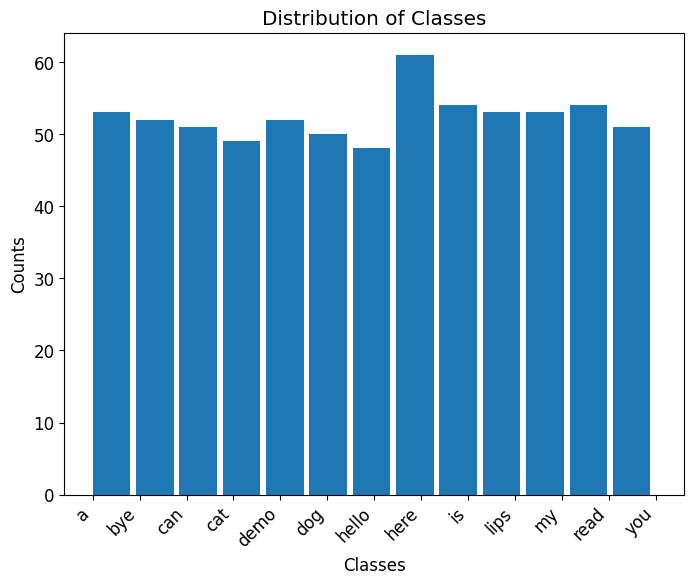

In [63]:
# Get the unique classes
classes = np.unique(labels)

# Count the number of occurrences of each class
counts = np.bincount(labels, minlength=len(classes))

# Set the figure size and font size
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 12})

# Plot the histogram
plt.hist(labels, bins=len(classes), width=0.8)
plt.xticks(range(len(classes)), [label_dict[i] for i in range(len(classes))], rotation=45, ha='right')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Distribution of Classes')

# Display the plot
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Normalize Input Data

In [ ]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

input_shape = (22, 80, 112, 3)


# Model Creation

In [65]:
model = Sequential()

# 3D CNN Feature Extractor
model.add(Conv3D(32, (3, 3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling3D((2, 2, 2)))

model.add(Conv3D(64, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling3D((2, 2, 2)))

model.add(Conv3D(128, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling3D((2, 2, 2)))

# Global Average Pooling to reduce overfitting
model.add(GlobalAveragePooling3D())

# Dense Classifier Layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output Layer with Softmax
model.add(Dense(13, activation='softmax'))

# Compile Model with Adam optimizer and lower learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 12s 184ms/step - accuracy: 0.1186 - loss: 2.7004 - val_accuracy: 0.0949 - val_loss: 2.6979
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.3817 - loss: 2.0492 - val_accuracy: 0.1022 - val_loss: 2.6948
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.6196 - loss: 1.3950 - val_accuracy: 0.1022 - val_loss: 2.6903
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.7082 - loss: 1.0415 - val_accuracy: 0.1022 - val_loss: 2.6927
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.8321 - loss: 0.7515 - val_accuracy: 0.1022 - val_loss: 2.7061
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.8735 - loss: 0.5586 - val_accuracy: 0.0657 - val_loss: 2.7151
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.8822 - loss: 0.5349 - val_accuracy: 0.1022 - val_loss: 2.7269
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9051 - loss: 0.4214 - val_accuracy: 0.1022 -

# One-Hot Encode Labels

In [ ]:

y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=13)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=13)


# Compute Class Weights for Imbalanced Data

In [ ]:
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Callbacks: Early Stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train Model with Class Weights
history = model.fit(X_train, y_train_onehot, epochs=50, batch_size=16, validation_data=(X_test, y_test_onehot),
                    class_weight=class_weights_dict)



# Train the model and record the history of training

In [ ]:

history = model.fit(X_train, y_train_onehot, epochs=30, batch_size=8, validation_data=(X_test, y_test_onehot))

# Train Model with Class Weights

In [ ]:
history = model.fit(X_train, y_train_onehot, epochs=50, batch_size=16, validation_data=(X_test, y_test_onehot),
                    class_weight=class_weights_dict)


# Evaluate Model

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_onehot, axis=1)
print(classification_report(y_true_labels, y_pred_labels))


In [72]:
model.save_weights('model2.weights.h5')

In [66]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


# Plot the training and validation loss and accuracy

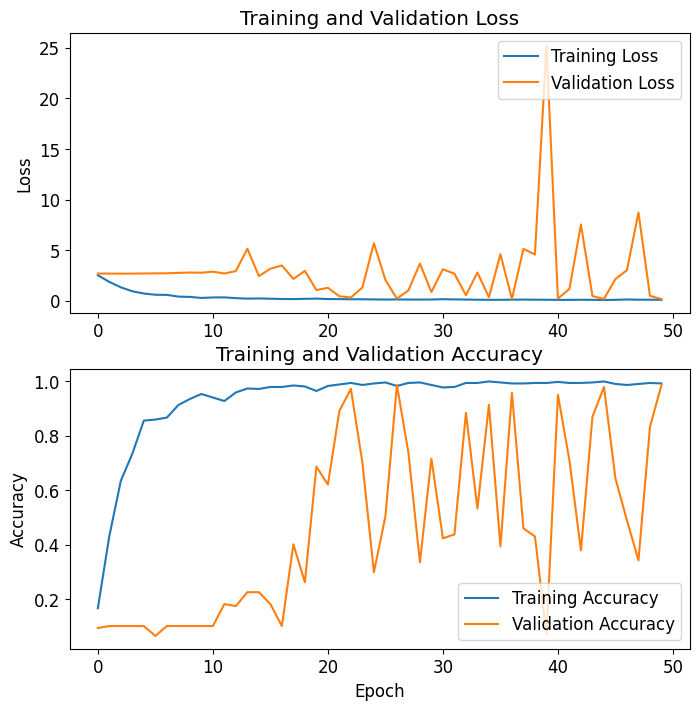

In [67]:

fig, axs = plt.subplots(2, 1, figsize=(8, 8))

axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].legend(loc='upper right')
axs[0].set_ylabel('Loss')
axs[0].set_title('Training and Validation Loss')

axs[1].plot(history.history['accuracy'], label='Training Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].legend(loc='lower right')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Training and Validation Accuracy')

plt.xlabel('Epoch')
plt.show()

In [68]:
report = classification_report(y_test, y_pred, output_dict=True)

table = PrettyTable()
table.field_names = ["Class", "Precision", "Recall", "F1-Score", "Support"]
for label, metrics in report.items():
    if label.isdigit():
        precision = round(metrics['precision'], 2)
        recall = round(metrics['recall'], 2)
        f1_score = round(metrics['f1-score'], 2)
        support = metrics['support']
        table.add_row([label_dict[int(label)], precision, recall, f1_score, support])

print(table)

+-------+-----------+--------+----------+---------+
| Class | Precision | Recall | F1-Score | Support |
+-------+-----------+--------+----------+---------+
|   a   |    1.0    |  0.92  |   0.96   |    12   |
|  bye  |    1.0    |  1.0   |   1.0    |    4    |
|  can  |    0.91   |  1.0   |   0.95   |    10   |
|  cat  |    1.0    |  1.0   |   1.0    |    15   |
|  demo |    1.0    |  1.0   |   1.0    |    10   |
|  dog  |    1.0    |  1.0   |   1.0    |    8    |
| hello |    1.0    |  1.0   |   1.0    |    11   |
|  here |    1.0    |  0.88  |   0.93   |    8    |
|   is  |    1.0    |  1.0   |   1.0    |    14   |
|  lips |    1.0    |  1.0   |   1.0    |    11   |
|   my  |    1.0    |  1.0   |   1.0    |    13   |
|  read |    0.92   |  1.0   |   0.96   |    11   |
|  you  |    1.0    |  1.0   |   1.0    |    10   |
+-------+-----------+--------+----------+---------+


In [69]:
print("Accuracy:", balanced_accuracy_score(y_test, y_pred))

Balanced accuracy: 0.9839743589743589
